# EDA on dataset - 1

In [1]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the dataset using pandas
data1 = pd.read_csv("../Dataset/Train/Voltage_L1_DataSet1.csv")
out1 = pd.read_csv("../Dataset/Train/OutputFor_DataSet1.csv")
data2 = pd.read_csv("../Dataset/Test/Voltage_L1_DataSet2.csv")
out2 = pd.read_csv("../Dataset/Test/OutputFor_DataSet2.csv")

In [3]:
print("data1",data1.shape)
print("out1",out1.shape)
print("data2",data2.shape)
print("out2",out2.shape)

data1 (11899, 128)
out1 (5999, 1)
data2 (5999, 128)
out2 (5999, 1)


## Data Preprocessing

This segment of notebook contains all the preprocessing steps which are performed on the data.

### Data cleaning

In [4]:
#dropna() function is used to remove all those rows which contains NA values
data1.dropna(axis=0,inplace=True)

In [5]:
#shape of the data frame after dropping the rows containing NA values
data1.shape

(5999, 128)

In [6]:
#here we are constructing the array which will finally contain the column names
header =[]
for i in range(1,data1.shape[1]+1):
    header.append("Col"+str(i))

In [7]:
#assigning the column name array to the respectinve dataframes
data1.columns = header
data2.columns = header

In [8]:
data1.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4805.126485,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200


In [9]:
data2.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-4918.927835,-4668.999112,-4375.127119,-4034.564431,-3659.213495,-3247.243211,-2804.145676,-2333.584172,-1841.965323,-1332.037736,...,-4663.506099,-4918.012016,-5121.251501,-5275.969344,-5381.249941,-5433.432863,-5434.348878,-5382.165656,-5278.715575,-5123.997634
1,2920.413836,2376.612648,1773.304349,1123.306756,444.013104,-248.097664,-933.799415,-1594.783666,-2213.654301,-2776.681104,...,4871.323226,4852.098262,4814.562485,4748.647181,4645.197563,4492.310731,4274.423564,3991.537412,3633.580485,3201.469277
2,-2808.723170,-2303.372710,-1758.656432,-1180.066319,-579.504820,32.957795,643.590017,1241.404644,1815.417600,2356.471851,...,-5151.462319,-5106.602976,-5027.871511,-4914.350757,-4759.632168,-4565.548254,-4319.281944,-4020.831887,-3671.114971,-3265.552744
3,2871.892861,2532.245964,2055.275298,1435.488878,704.927781,-86.971408,-871.546088,-1584.713275,-2177.034698,-2625.625239,...,5858.221546,5590.898767,5202.730284,4759.633062,4322.945050,3943.932165,3647.312850,3432.172965,3265.553468,3098.018896
4,5534.138053,5395.898976,5186.251418,4924.421624,4631.464792,4323.859863,4009.847091,3692.171624,3363.511349,3012.878248,...,3558.510431,3879.847783,4193.860201,4506.042306,4808.154800,5085.548312,5318.082271,5487.448225,5576.250464,5574.419599


In [10]:
#now we are combining the two dataframes to make a final dataframe
data = data1.append(data2, ignore_index = True)
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4805.126485,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200


In [11]:
data.shape

(11998, 128)

In [12]:
#here we are giving a name to the output column
header_out = ["output"]
out1.columns = header_out
out2.columns = header_out

In [13]:
out2.head()

,output
0,1
1,2
2,2
3,3
4,3


In [14]:
#now we are combining the output columns
output = out1.append(out2, ignore_index = True)
output.head()

,output
0,1
1,2
2,2
3,3
4,3


In [15]:
output.shape

(11998, 1)

In [16]:
#now we are appending the output column to the original dataframe which contains the power signals
data['output'] = output

In [17]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128,output
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205,1
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102,2
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897,2
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684,3
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200,3


In [18]:
data_arr = data.to_numpy()

In [19]:
transform = StandardScaler()
data_norm = transform.fit_transform(data_arr)

In [20]:
data_norm_fft = data_arr.copy()
n = data_norm_fft.shape[0]
for i in range(0,n):
    data_norm_fft[i] = np.append(fft(data_norm_fft[i][0:128]),data_norm_fft[i][128])
transform = StandardScaler()
data_norm_fft = transform.fit_transform(data_norm_fft)    

<ipython-input-20-6138b7d18cfd>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  data_norm_fft[i] = np.append(fft(data_norm_fft[i][0:128]),data_norm_fft[i][128])


In [21]:
data_arr.shape

(11998, 129)

class Normal wave


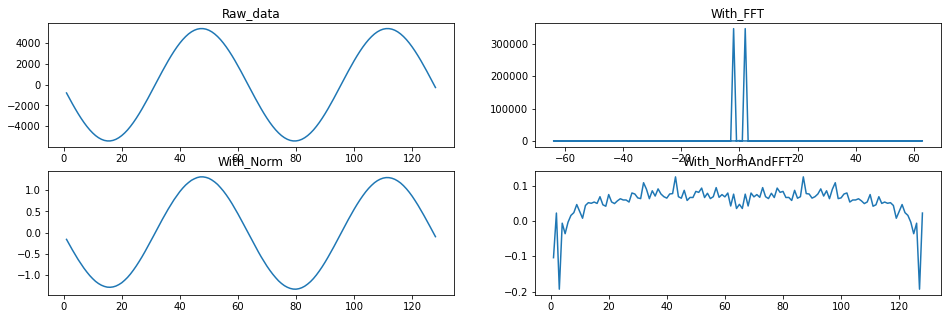

In [27]:
print("class", "Normal wave")
fig, axes = plt.subplots(2, 2,figsize=(16,5))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[0][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[0][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[0][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[0][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class 3rd harmonic wave


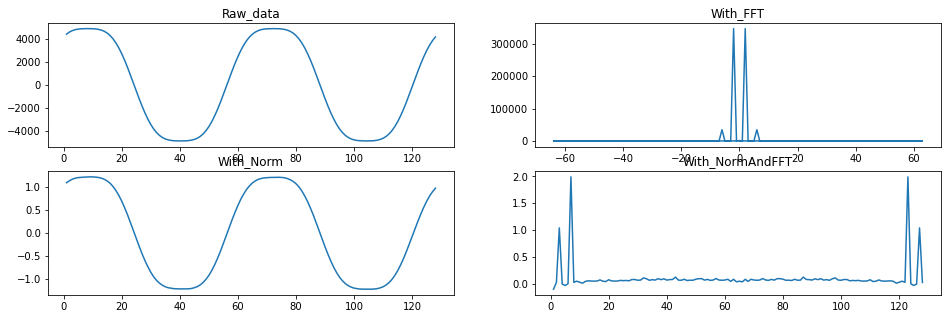

In [23]:
print("class", "3rd harmonic wave")
fig, axes = plt.subplots(2, 2,figsize=(16,5))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[1][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[1][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[1][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[1][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class 5th harmonic wave


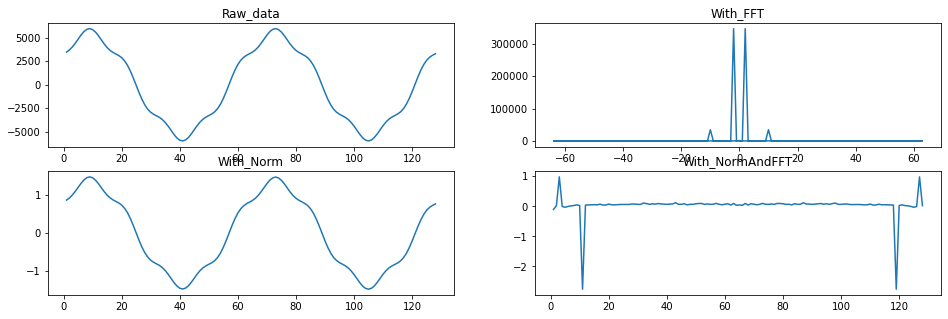

In [24]:
print("class", "5th harmonic wave")
fig, axes = plt.subplots(2, 2,figsize=(16,5))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[3][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[3][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[3][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[3][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class Voltage dip


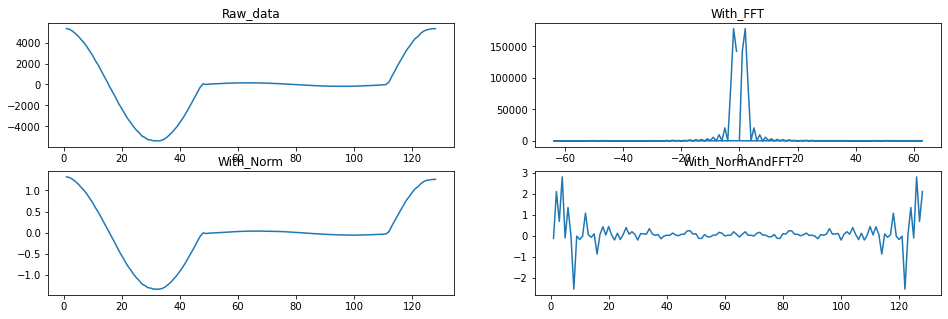

In [25]:
print("class", "Voltage dip")
fig, axes = plt.subplots(2, 2,figsize=(16,5))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[6][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[6][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[6][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[6][0:128])
axes[1][1].title.set_text('With_NormAndFFT')

class Transient wave


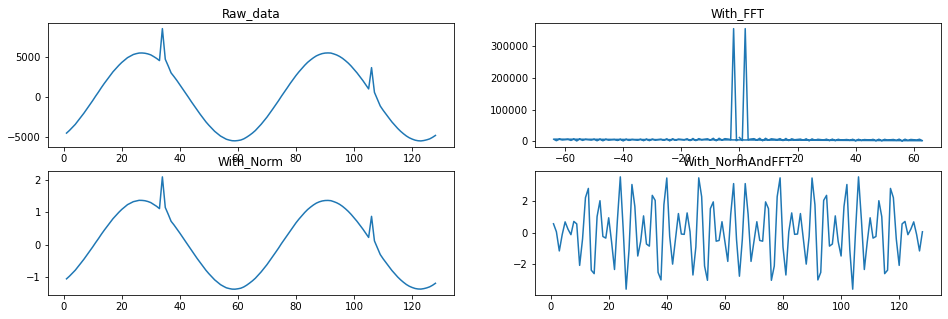

In [26]:
print("class", "Transient wave")
fig, axes = plt.subplots(2, 2,figsize=(16,5))

#raw data
axes[0][0].plot([i for i in range(1,129)], data_arr[8][0:128])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(data_arr[8][0:128])
xf = fftfreq(128,1/128)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,129)], data_norm[8][0:128])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,129)], data_norm_fft[8][0:128])
axes[1][1].title.set_text('With_NormAndFFT')